In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from DarkNews import const
from DarkNews import plot_tools as pt

from alp.models import ALP, Gamma_tau
from alp import plot_tools as pt

# Branching Ratios

In [3]:
def make_muon_plot(inv_fa_range=[1e-10,1], ma_range=[1e-2, const.m_tau - const.m_e*1.01], Npoints=101, c_lepton=np.ones((3,3)), name='', c_NN=0, mN=0):
    fig, ax = pt.std_fig(figsize=(5,5))
    inv_fas = np.geomspace(*inv_fa_range, Npoints, endpoint=True)
    m_alps = np.geomspace(*ma_range, Npoints, endpoint=True)
    MA, INV_FA = np.meshgrid(m_alps, inv_fas)
    
    alp = ALP(MA, 1/INV_FA, c_lepton=c_lepton)
    # Z = const.get_decay_rate_in_cm(alp.Gamma_a)

    # Z = alp.BR_li_to_lj_a(1, 0)
    Z = alp.BR_li_to_lj_a_gamma(1, 0)
    print(Z)
    ax.contour(MA, INV_FA, Z, levels=[1e-4], colors='k', linestyles='--')

    ax.set_yscale('log')
    ax.set_xscale('log')    

/opt/homebrew/Caskroom/miniforge/base/envs/darknews/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:777: ComplexWarning: Casting complex values to real discards the imaginary part
  y[cond] = func(vals, *args, **kw)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

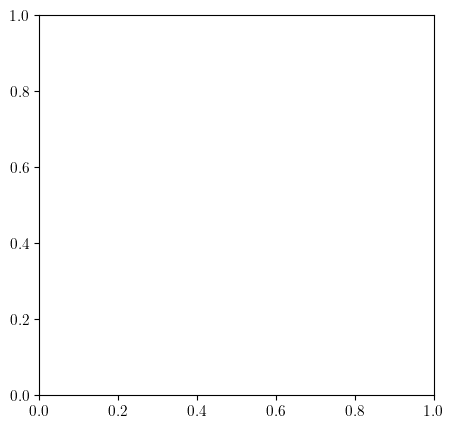

In [4]:
make_muon_plot()

In [804]:
alp = ALP(0.06, 0.5e9, c_lepton=np.ones((3,3)))
# alp.BR_li_to_lj_a_gamma(1,0, E_gamma_min=0.8, E_e_min=0.03, theta_eg_min=140*np.pi/180)
alp.BR_li_to_lj_a_gamma(1,0)

/opt/homebrew/Caskroom/miniforge/base/envs/darknews/lib/python3.11/site-packages/scipy/integrate/_quadpack_py.py:1260: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/opt/homebrew/Caskroom/miniforge/base/envs/darknews/lib/python3.11/site-packages/scipy/integrate/_quadpack_py.py:1260: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


0.0002529578071981201

In [511]:
alp = ALP(0.01, 0.5e9, c_lepton=np.ones((3,3)))
# alp.BR_li_to_lj_a_gamma(1,0, E_gamma_min=0.8, E_e_min=0.03, theta_eg_min=140*np.pi/180)
Ea = np.linspace(alp.m_a, const.m_mu, 200)
alp.BR_diff_li_to_lj_a_gamma_dEa(1, 0, Ea)


/Users/mhostert/Repos/tau_LLPs/alp/models.py:990: RuntimeWarning: invalid value encountered in log
  def s12_min(M, m1, m2, m3):


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [515]:
mas = np.geomspace(0.001, 0.1, 100)
fas = np.geomspace(1e-10, 1, 100)
alp = ALP(0.01, 1/fas, c_lepton=np.ones((3,3)))

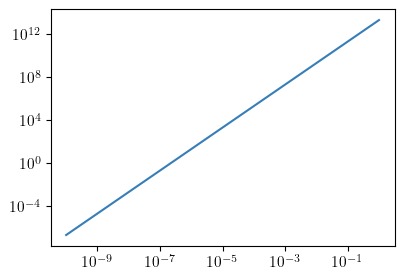

In [516]:
plt.loglog(fas, alp.BR_li_to_lj_a(1,0), label='ALP')

In [517]:
from alp import models 

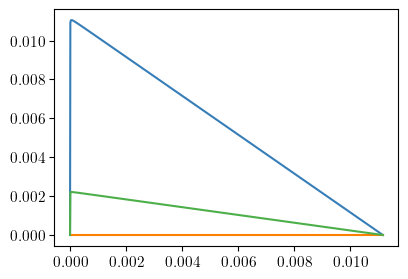

In [518]:
# models.s12_max(const.m_mu, const.m_e, 0, 0.01), models.s12_min(const.m_mu, const.m_e, 0, 0.01)
ma = 0.00
x = np.linspace(0, 1, 1000)
s12 = x*(models.s12_max(const.m_mu, const.m_e, 0, ma) - models.s12_min(const.m_mu, const.m_e, 0, ma)) + models.s12_min(const.m_mu, const.m_e, 0, ma)
plt.plot(s12, models.s23_max(s12, const.m_mu, const.m_e, 0, ma))
plt.plot(s12, models.s23_min(s12, const.m_mu, const.m_e, 0, ma))

s23 = 0.2*(models.s23_max(s12, const.m_mu, const.m_e, 0, ma) - models.s23_min(s12, const.m_mu, const.m_e, 0, ma)) + models.s23_min(s12, const.m_mu, const.m_e, 0, ma)
plt.plot(s12, s23)

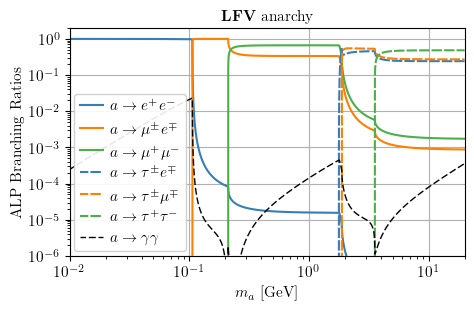

In [843]:
fa = 1e9
malps = np.geomspace(1e-4, 2e1, 10000)
alps = ALP(malps, fa)

fig, ax = pt.std_fig(figsize=(5,3))

ax.plot(malps, 1/alps.Gamma_a*(alps.Gamma_a_to_ee()), label=r'$a \to e^+e^-$')
ax.plot(malps, 1/alps.Gamma_a*(alps.Gamma_a_to_me()+alps.Gamma_a_to_em()), label=r'$a \to \mu^\pm e^\mp$')
ax.plot(malps, 1/alps.Gamma_a*(alps.Gamma_a_to_mm()), label=r'$a \to \mu^+\mu^-$')
# plt.color_sequences = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
ax.set_prop_cycle(None)

ax.plot(malps, 1/alps.Gamma_a*(alps.Gamma_a_to_te()+alps.Gamma_a_to_et()), label=r'$a \to \tau^\pm e^\mp$', ls=(1,(5,1)))
ax.plot(malps, 1/alps.Gamma_a*(alps.Gamma_a_to_tm()+alps.Gamma_a_to_mt()), label=r'$a \to \tau^\pm\mu^\mp$', ls=(1,(5,1)))
ax.plot(malps, 1/alps.Gamma_a*(alps.Gamma_a_to_tt()), label=r'$a \to \tau^+\tau^-$', ls=(1,(5,1)))
ax.plot(malps, 1/alps.Gamma_a*(alps.Gamma_a_to_gg()), label=r'$a \to \gamma\gamma$', color='black', ls=(1,(5,2)), lw=1)

ax.legend(loc=(0.01,0.02), fontsize=11, frameon=True, handlelength=1.5, handletextpad=0.5, framealpha=0.9)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$m_a$ [GeV]')
ax.set_ylabel(r'ALP Branching Ratios')
ax.set_title(r'{\bf LFV} anarchy', fontsize=11)
ax.grid()
ax.set_ylim(1e-6, 2)
ax.set_xlim(1e-2, 2e1)
fig.savefig('plots/alp_decay_branches.pdf', dpi=300, bbox_inches='tight')

In [771]:
const.m_charged_rho, const.fcharged_rho, const.m_charged_pion, const.fcharged_pion

(0.7758, 0.22, 0.1396, 0.1307)

In [773]:
models.Gamma_tau # in GeV

2.267350867723045e-12

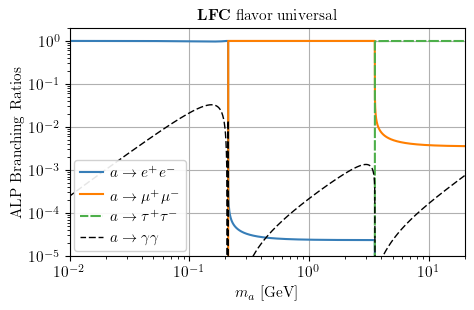

In [848]:
fa = 1e9
malps = np.geomspace(1e-4, 2e1, 10000)
alps = ALP(malps, fa, c_lepton=np.diag([1.,1.,1.]))

fig, ax = pt.std_fig(figsize=(5,3))


ax.plot(malps, 1/alps.Gamma_a*(alps.Gamma_a_to_ee()), label=r'$a \to e^+e^-$')
ax.plot(malps, 1/alps.Gamma_a*(alps.Gamma_a_to_mm()), label=r'$a \to \mu^+\mu^-$')
ax.plot(malps, 1/alps.Gamma_a*(alps.Gamma_a_to_tt()), label=r'$a \to \tau^+\tau^-$', ls=(1,(5,1)))
ax.plot(malps, 1/alps.Gamma_a*(alps.Gamma_a_to_gg()), label=r'$a \to \gamma\gamma$', color='black', ls=(1,(5,2)), lw=1)

ax.legend(loc=(0.01,0.02), fontsize=11, frameon=True, handlelength=1.5, handletextpad=0.5, framealpha=0.9)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$m_a$ [GeV]')
ax.set_ylabel(r'ALP Branching Ratios')
ax.set_title(r'{\bf LFC} flavor universal', fontsize=11)
ax.grid()
ax.set_ylim(1e-5, 2)
ax.set_xlim(1e-2, 2e1)
fig.savefig('plots/alp_decay_branches_LFC.pdf', dpi=300, bbox_inches='tight')

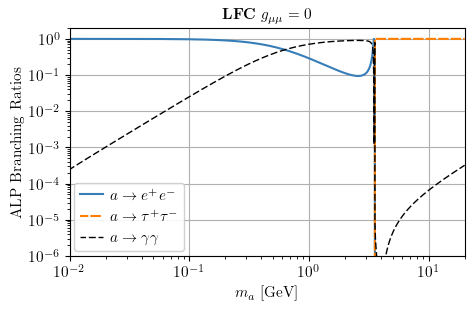

In [850]:
fa = 1e9
malps = np.geomspace(1e-4, 2e1, 10000)
alps = ALP(malps, fa, c_lepton=np.diag([1.,0.,1.]))

fig, ax = pt.std_fig(figsize=(5,3))

ax.plot(malps, 1/alps.Gamma_a*(alps.Gamma_a_to_ee()), label=r'$a \to e^+e^-$')
ax.plot(malps, 1/alps.Gamma_a*(alps.Gamma_a_to_tt()), label=r'$a \to \tau^+\tau^-$', ls=(1,(5,1)))
ax.plot(malps, 1/alps.Gamma_a*(alps.Gamma_a_to_gg()), label=r'$a \to \gamma\gamma$', color='black', ls=(1,(5,2)), lw=1)

ax.legend(loc=(0.01,0.02), fontsize=11, frameon=True, handlelength=1.5, handletextpad=0.5, framealpha=0.9)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$m_a$ [GeV]')
ax.set_ylabel(r'ALP Branching Ratios')
ax.set_title(r'{\bf LFC} $g_{\mu \mu} = 0$', fontsize=11)
ax.grid()
ax.set_ylim(1e-6, 2)
ax.set_xlim(1e-2, 2e1)
fig.savefig('plots/alp_decay_branches_LFC_etau.pdf', dpi=300, bbox_inches='tight')

/Users/mhostert/Repos/DarkNews-generator/src/DarkNews/const.py:228: RuntimeWarning: divide by zero encountered in divide
  return 1.0 / G * invGeV_to_cm


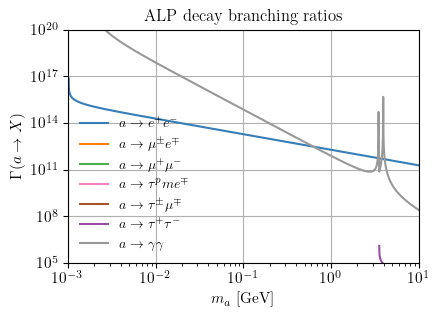

In [520]:


fig, ax = pt.std_fig()

fa = 1e9
malps = np.geomspace(1e-4, 1e1, 10000)

alps = ALP(malps, fa, c_lepton=np.diag([1,0,1]))
ax.plot(malps, const.get_decay_rate_in_cm(alps.Gamma_a_to_ee()), label=r'$a \to e^+e^-$')
ax.plot(malps, const.get_decay_rate_in_cm(alps.Gamma_a_to_me()+alps.Gamma_a_to_em()), label=r'$a \to \mu^\pm e^\mp$')
ax.plot(malps, const.get_decay_rate_in_cm(alps.Gamma_a_to_mm()), label=r'$a \to \mu^+\mu^-$')
ax.plot(malps, const.get_decay_rate_in_cm(alps.Gamma_a_to_te()+alps.Gamma_a_to_et()), label=r'$a \to \tau^pm e^\mp$')
ax.plot(malps, const.get_decay_rate_in_cm(alps.Gamma_a_to_tm()+alps.Gamma_a_to_mt()), label=r'$a \to \tau^\pm\mu^\mp$')
ax.plot(malps, const.get_decay_rate_in_cm(alps.Gamma_a_to_tt()), label=r'$a \to \tau^+\tau^-$')
ax.plot(malps, const.get_decay_rate_in_cm(alps.Gamma_a_to_gg()), label=r'$a \to \gamma\gamma$')

ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$m_a$ [GeV]')
ax.set_ylabel(r'$\Gamma(a \to X)$')
ax.set_title(r'ALP decay branching ratios')
ax.grid()
ax.set_ylim(1e5, 1e20)
ax.set_xlim(1e-3, 1e1)
fig.savefig('alp_decay_rates.png', dpi=300, bbox_inches='tight')

# Total decayy rate in LFC cases

In [798]:
alp = ALP(0.01, 1/0.2, c_lepton=np.diag([1,0,1]))
alp.BR_tau_to_e_nu_nu_a()

np.float64(4e-06)

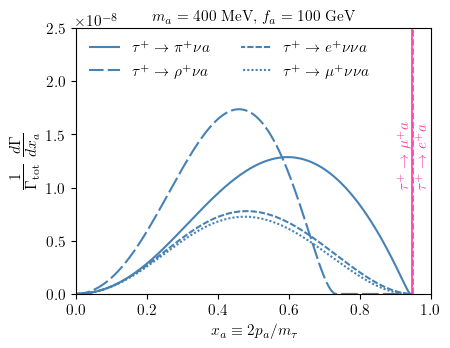

In [9]:
ma = 0.4
channel = 'tau>nu+nu+e+a'

alp = ALP(ma, 1e2, c_lepton=np.ones((3,3)))

fig, ax = pt.std_fig(figsize=(4.5,3.5))

Ea = np.linspace(alp.Ea_min[channel], alp.Ea_max[channel], 1000)
pa = np.sqrt(Ea**2-ma**2)
x = 2*pa/const.m_tau
dx_dE = pa/Ea * const.m_tau/2
# dx_dE = const.m_tau**2 * x / 4 /Ea
ax.plot(x, dx_dE*alp.diff_BR_tau_to_pi_nu_a(Ea), color='steelblue', label=r'$\tau^+ \to \pi^+ \nu a$', ls=(1,(3,0)))
ax.plot(x, dx_dE*alp.diff_BR_tau_to_rho_nu_a(Ea), color='steelblue', label=r'$\tau^+ \to \rho^+ \nu a$', ls=(1,(8,2)))
ax.plot(x, dx_dE*alp.diff_BR_tau_to_nu_nu_e_a(Ea), color='steelblue', label=r'$\tau^+ \to e^+ \nu \nu a$', ls=(1,(3,1)))
ax.plot(x, dx_dE*alp.diff_BR_tau_to_nu_nu_mu_a(Ea), color='steelblue', label=r'$\tau^+ \to \mu^+ \nu \nu a$', ls=(1,(1,1)))

LFV_color=pt.lighten_color('deeppink', 0.8)
ax.vlines(np.sqrt(alp.Ea_max['tau>e+a']**2 - ma**2) / (const.m_tau/2), 0, 1, color=LFV_color, ls='--', lw=1.25)
ax.annotate(r'$\tau^+ \to e^+ a$', xy=(0.96, 1.e-8), xycoords='data', color=LFV_color, fontsize=11, rotation=90)

ax.vlines(np.sqrt(alp.Ea_max['tau>mu+a']**2 - ma**2) / (const.m_tau/2), 0, 1, color=LFV_color, ls='-', lw=1.25)
ax.annotate(r'$\tau^+ \to \mu^+ a$', xy=(0.9, 1.e-8), xycoords='data', color=LFV_color, fontsize=11, rotation=90)

ax.set_ylim(0,2.5e-8)
# ax.set_ylim(0,1e-8)
# ax.set_yscale('log')
ax.set_xlim(0, 1)
ax.set_xlabel(r'$x_a \equiv 2 p_a/m_\tau$')
ax.set_ylabel(r'$\frac{1}{\Gamma_{\rm tot}} \,\frac{d {\rm \Gamma}}{d x_a}$', fontsize=16, rotation=90, labelpad=5)
ax.set_title(rf'\noindent $m_a = {ma*1e3:.0f}$~MeV, $f_a = 100$~GeV', fontsize=11)
ax.legend(ncol=2, loc='upper left', fontsize=11)
fig.savefig('plots/diff_BR_tau_to_alps.pdf', bbox_inches='tight')

In [855]:
alp = ALP(0.1, 1e2, c_lepton=np.ones((3,3)))

x = np.linspace(0, 1, 1000)
pa = x / (const.m_tau/2)
Ea = np.sqrt(pa**2 + ma**2)
dx_dE = pa/Ea * const.m_tau/2
(alp.diff_BR_tau_to_rho_nu_a(x)[:-1]*np.diff(x)).sum()

/Users/mhostert/Repos/tau_LLPs/alp/models.py:595: RuntimeWarning: invalid value encountered in sqrt
  * v_2body(const.m_tau, np.sqrt(mtau_barSQR), self.m_a)


np.float64(2.3313444723000676e-08)

In [856]:
alp = ALP(0.1, 1/0.2, c_lepton=np.ones((3,3)))
channel = 'tau>nu+nu+e+a'

Ea = np.linspace(alp.Ea_min['tau>nu+rho+a'], alp.Ea_max['tau>nu+rho+a'], 1000)
print(np.sum(alp.diff_BR_tau_to_rho_nu_a(Ea)[:-1]*np.diff(Ea)) / alp.tau_BR('tau>nu+rho+a'))

Ea = np.random.uniform(alp.Ea_min[channel], alp.Ea_max[channel], 100000)
np.sum(alp.diff_BR_tau_to_nu_nu_e_a(Ea))/len(Ea) * (Ea.max() - Ea.min())/ alp.tau_BR(channel)


1.0136158856254056


np.float64(1.2168821079354992)

In [857]:
dx_dE*alp.diff_BR_tau_to_pi_nu_a(Ea)

ValueError: operands could not be broadcast together with shapes (1000,) (100000,) 

In [897]:
alp.BR_a_to_tm()

TypeError: 'numpy.float64' object is not callable

In [1004]:
Npsi2S_per_POT = 1#4e-6
rates = []
mavals = np.linspace(1.8, 2, 300)
favals = np.geomspace(1e5, 1e8, 500)
for ma in mavals:
    for fa in favals:
        alp = ALP(ma, fa, c_lepton=np.ones((3,3)))
        r = 0
        for i in range(3):
            for j in range(3):
                if i != j:
                    r += Npsi2S_per_POT*alp.BR_Psi2S_to_li_lj_a(i,j) * 6e20 * alp.prob_decay(50, 33.7e2, 50e2) * alp.alp_visible_BR(['tt','te','et','mt','tm','mm'])
        rates.append(r)


/opt/homebrew/Caskroom/miniforge/base/envs/darknews/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:777: ComplexWarning: Casting complex values to real discards the imaginary part
  y[cond] = func(vals, *args, **kw)


/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_84607/304045146.py:3: RuntimeWarning: divide by zero encountered in log10
  c=plt.contour(M, 1/FA, np.log10(Z), levels=[2.3], color='black')
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_84607/304045146.py:3: UserWarning: The following kwargs were not used by contour: 'color'
  c=plt.contour(M, 1/FA, np.log10(Z), levels=[2.3], color='black')


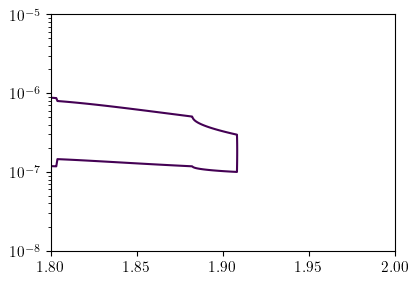

In [1005]:
M, FA = np.meshgrid(mavals, favals, indexing='ij')
Z = np.reshape(rates, M.shape)
c=plt.contour(M, 1/FA, np.log10(Z), levels=[2.3], color='black')
# plt.colorbar()
# plt.xscale('log')
plt.yscale('log')